<a href="https://colab.research.google.com/github/JvrCandido/CP5-IA/blob/main/C%C3%B3pia_de_Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Visualizando as primeiras linhas do DataFrame:
   Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
0   1   Precious Achiuwa   C   22  TOR  73  28  23.6  3.6   8.3  ...  0.595   
1   2       Steven Adams   C   28  MEM  76  75  26.3  2.8   5.1  ...  0.543   
2   3        Bam Adebayo   C   24  MIA  56  56  32.6  7.3  13.0  ...  0.753   
3   4       Santi Aldama  PF   21  MEM  32   0  11.3  1.7   4.1  ...  0.625   
4   5  LaMarcus Aldridge   C   36  BRK  47  12  22.3  5.4   9.7  ...  0.873   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  2.0  4.5   6.5  1.1  0.5  0.6  1.2  2.1   9.1  
1  4.6  5.4  10.0  3.4  0.9  0.8  1.5  2.0   6.9  
2  2.4  7.6  10.1  3.4  1.4  0.8  2.6  3.1  19.1  
3  1.0  1.7   2.7  0.7  0.2  0.3  0.5  1.1   4.1  
4  1.6  3.9   5.5  0.9  0.3  1.0  0.9  1.7  12.9  

[5 rows x 30 columns]

Número de linhas e 

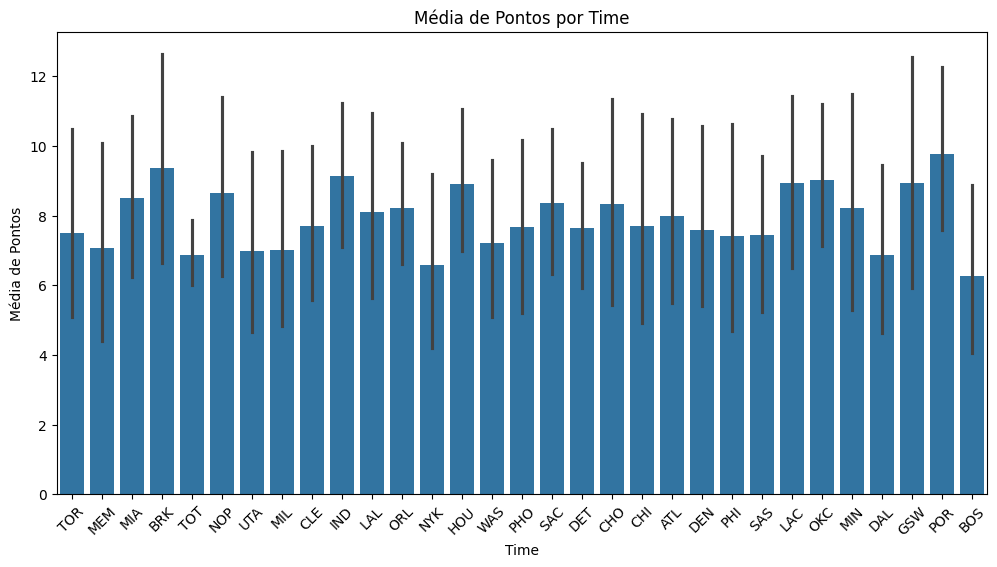

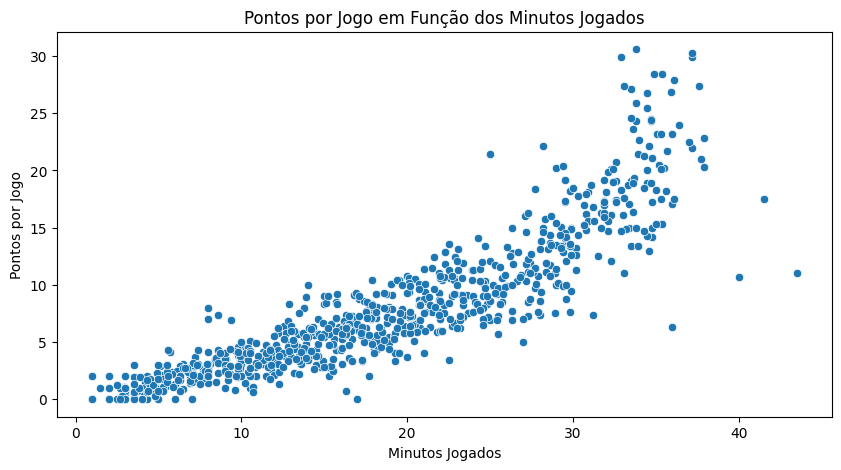

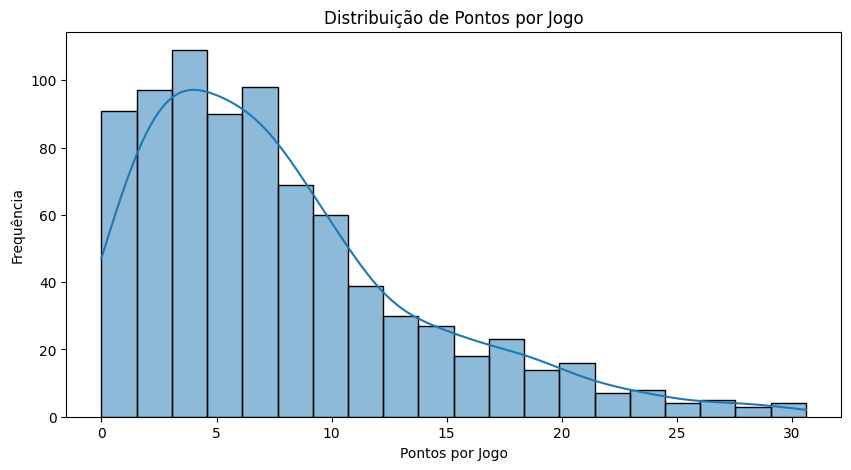


Avaliação do Modelo:
RMSE: 0.07203528490075184
R²: 0.9998698789559672


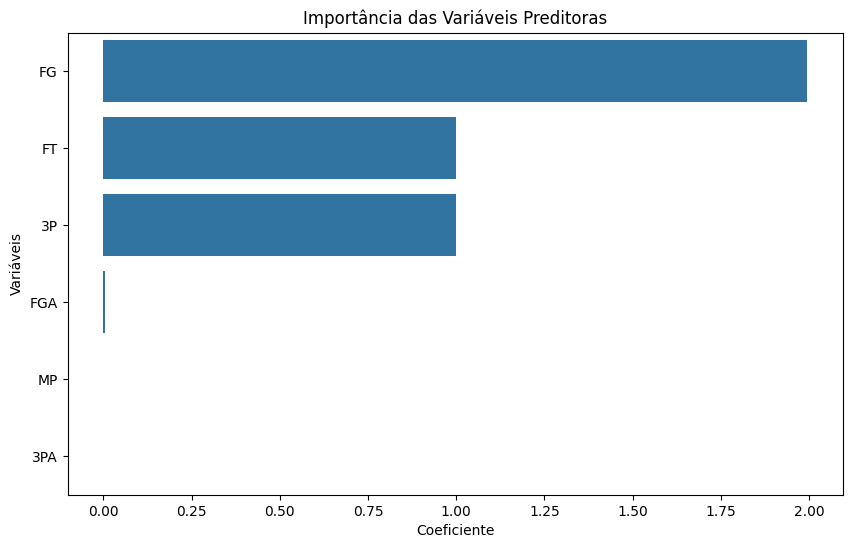


Interpretação:
Os resultados mostram que o modelo de regressão linear foi capaz de prever os pontos (PTS) com uma média de erro de RMSE de 0.07 e um valor R² de 1.00. Isso indica que o modelo explica 99.99% da variação nos pontos marcados pelos jogadores.

Analisando as variáveis preditoras, podemos concluir que:
A variável 'FG' tem um coeficiente positivo de 2.00, indicando que, à medida que FG aumenta, o número de pontos marcados (PTS) tende a aumentar.
A variável 'FT' tem um coeficiente positivo de 1.00, indicando que, à medida que FT aumenta, o número de pontos marcados (PTS) tende a aumentar.
A variável '3P' tem um coeficiente positivo de 1.00, indicando que, à medida que 3P aumenta, o número de pontos marcados (PTS) tende a aumentar.
A variável 'FGA' tem um coeficiente positivo de 0.01, indicando que, à medida que FGA aumenta, o número de pontos marcados (PTS) tende a aumentar.
A variável 'MP' tem um coeficiente negativo de -0.00, sugerindo que um aumento em MP está associado a 

In [10]:
#RM: 554727, João Victor Rocha Cândido
#RM: 557129, João Vitor Broggine Lopes
#RM: 555679, Lavinia Soo Hyun Park

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suprimir avisos de futuras alterações
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Montar o Google Drive
drive.mount('/content/drive')

# 2. Carregar o arquivo CSV
df = pd.read_csv('2021-2022 NBA Player Stats - Regular.csv',
                 delimiter=';', encoding='ISO-8859-1')

# 3. Definição da Questão
# Pergunta: "Quais fatores influenciam o número de pontos (PTS) marcados pelos jogadores na temporada 2021-2022?"

# 4. Análise Exploratória
## 4.1 Carregamento e visualização dos dados
print("Visualizando as primeiras linhas do DataFrame:")
print(df.head())
print("\nNúmero de linhas e colunas:", df.shape)
print("\nNatureza dos dados:")
print(df.dtypes)

## 4.2 Tratamento de dados faltantes
print("\nDados faltantes por coluna:")
print(df.isnull().sum())
df.fillna(0, inplace=True)  # Preencher dados faltantes com 0

## 4.3 Análise descritiva
print("\nEstatísticas descritivas para variáveis numéricas:")
print(df.describe())

## 4.4 Visualização dos dados
# Gráfico de barras para a média de pontos por time
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Tm', y='PTS')
plt.title('Média de Pontos por Time')
plt.xlabel('Time')
plt.ylabel('Média de Pontos')
plt.xticks(rotation=45)
plt.show()

# Gráficos de dispersão
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='MP', y='PTS')
plt.title('Pontos por Jogo em Função dos Minutos Jogados')
plt.xlabel('Minutos Jogados')
plt.ylabel('Pontos por Jogo')
plt.show()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['PTS'], bins=20, kde=True)
plt.title('Distribuição de Pontos por Jogo')
plt.xlabel('Pontos por Jogo')
plt.ylabel('Frequência')
plt.show()

# 5. Criação do Modelo Supervisionado
# 5.1 Divisão do dataset em treino e teste
X = df[['MP', 'FG', 'FGA', '3P', '3PA', 'FT']]  # Exemplos de variáveis preditoras
y = df['PTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.2 Treinamento e Avaliação do Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nAvaliação do Modelo:")
print("RMSE:", rmse)
print("R²:", r2)

# Coeficientes do modelo
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente']).sort_values(by='Coeficiente', ascending=False)

# Visualização dos coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(data=coef, x='Coeficiente', y=coef.index)
plt.title('Importância das Variáveis Preditoras')
plt.xlabel('Coeficiente')
plt.ylabel('Variáveis')
plt.show()

# 6. Interpretação dos Resultados
print("\nInterpretação:")
print("Os resultados mostram que o modelo de regressão linear foi capaz de prever os pontos (PTS) com uma média de erro de RMSE de {:.2f} e um valor R² de {:.2f}."
      " Isso indica que o modelo explica {:.2f}% da variação nos pontos marcados pelos jogadores.".format(rmse, r2, r2 * 100))

print("\nAnalisando as variáveis preditoras, podemos concluir que:")
for var, coef_value in zip(coef.index, coef['Coeficiente']):
    if coef_value > 0:
        print(f"A variável '{var}' tem um coeficiente positivo de {coef_value:.2f}, indicando que, à medida que {var} aumenta, o número de pontos marcados (PTS) tende a aumentar.")
    else:
        print(f"A variável '{var}' tem um coeficiente negativo de {coef_value:.2f}, sugerindo que um aumento em {var} está associado a uma diminuição nos pontos marcados (PTS).")
